In [1]:
import imageio
import pickle
import pandas as pd
import numpy as np
import PyNAFF as pnf
import scipy.io as sio 
import matplotlib.cm as cm
from math import log10, floor
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from scipy.optimize import curve_fit

In [2]:
plt.rcParams['figure.figsize'] = [5.0, 4.5]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 14

plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 10

plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5

In [3]:
def add_input_file(dd, filename, label):
	f = filename
	p = dict()
	sio.loadmat(f, mdict=p)
	dd[label] = p	
	print '\tAdded output data from ', filename, '\t dictionary key: ', label
	return dd

In [4]:
dd = dict()
dd = add_input_file(dd, '00_00/output/output.mat', '00')

	Added output data from  00_00/output/output.mat 	 dictionary key:  00


In [5]:
sc = 'NoSC'
legend_label = ''    
main_label = 'MD211'
main_label2 = main_label + '_zoom'
scaled_label = main_label + '_scaled'
turn_tot = 2200
zoom_turns = 30
turns = [0, 1, 10, 50, 100, 874, 2185, 2199]
betagamma = 2.492104532 * 0.9159915293879255

In [6]:
dd['00'].keys()

['eps_z',
 'D_x',
 'D_y',
 'kurtosis_yp_6sig',
 'kurtosis_yp',
 'mu_yp',
 'kurtosis_z_6sig',
 'eff_beta_y',
 'eff_beta_x',
 'eff_alpha_y',
 'kurtosis_y_6sig',
 'epsn_y',
 'epsn_x',
 'beta_y',
 'beta_x',
 'dpp_rms',
 'sig_yp',
 'min_dE',
 'turn_time',
 'n_mp',
 'min_xp',
 'kurtosis_y',
 'kurtosis_xp_6sig',
 'alpha_x',
 'alpha_y',
 'bunchlength',
 '__header__',
 'sig_xp',
 'kurtosis_dE_6sig',
 'max_xp',
 'intensity',
 'min_yp',
 'sig_dE',
 'min_x',
 'min_y',
 'mu_y',
 'mu_x',
 'cumulative_time',
 'mean_yp',
 'kurtosis_xp',
 'eff_epsn_y',
 'eff_epsn_x',
 'mean_x',
 'mean_y',
 'mean_z',
 'kurtosis_x_6sig',
 '__version__',
 'max_z',
 'mu_dE',
 'max_x',
 'max_y',
 'mean_dE',
 'sig_z',
 'sig_y',
 'sig_x',
 'max_yp',
 'kurtosis_z',
 'eff_alpha_x',
 'kurtosis_x',
 'mu_xp',
 'turn_duration',
 'mu_z',
 'mean_xp',
 'min_z',
 'kurtosis_dE',
 '__globals__',
 'turn',
 'max_dE',
 'gamma']

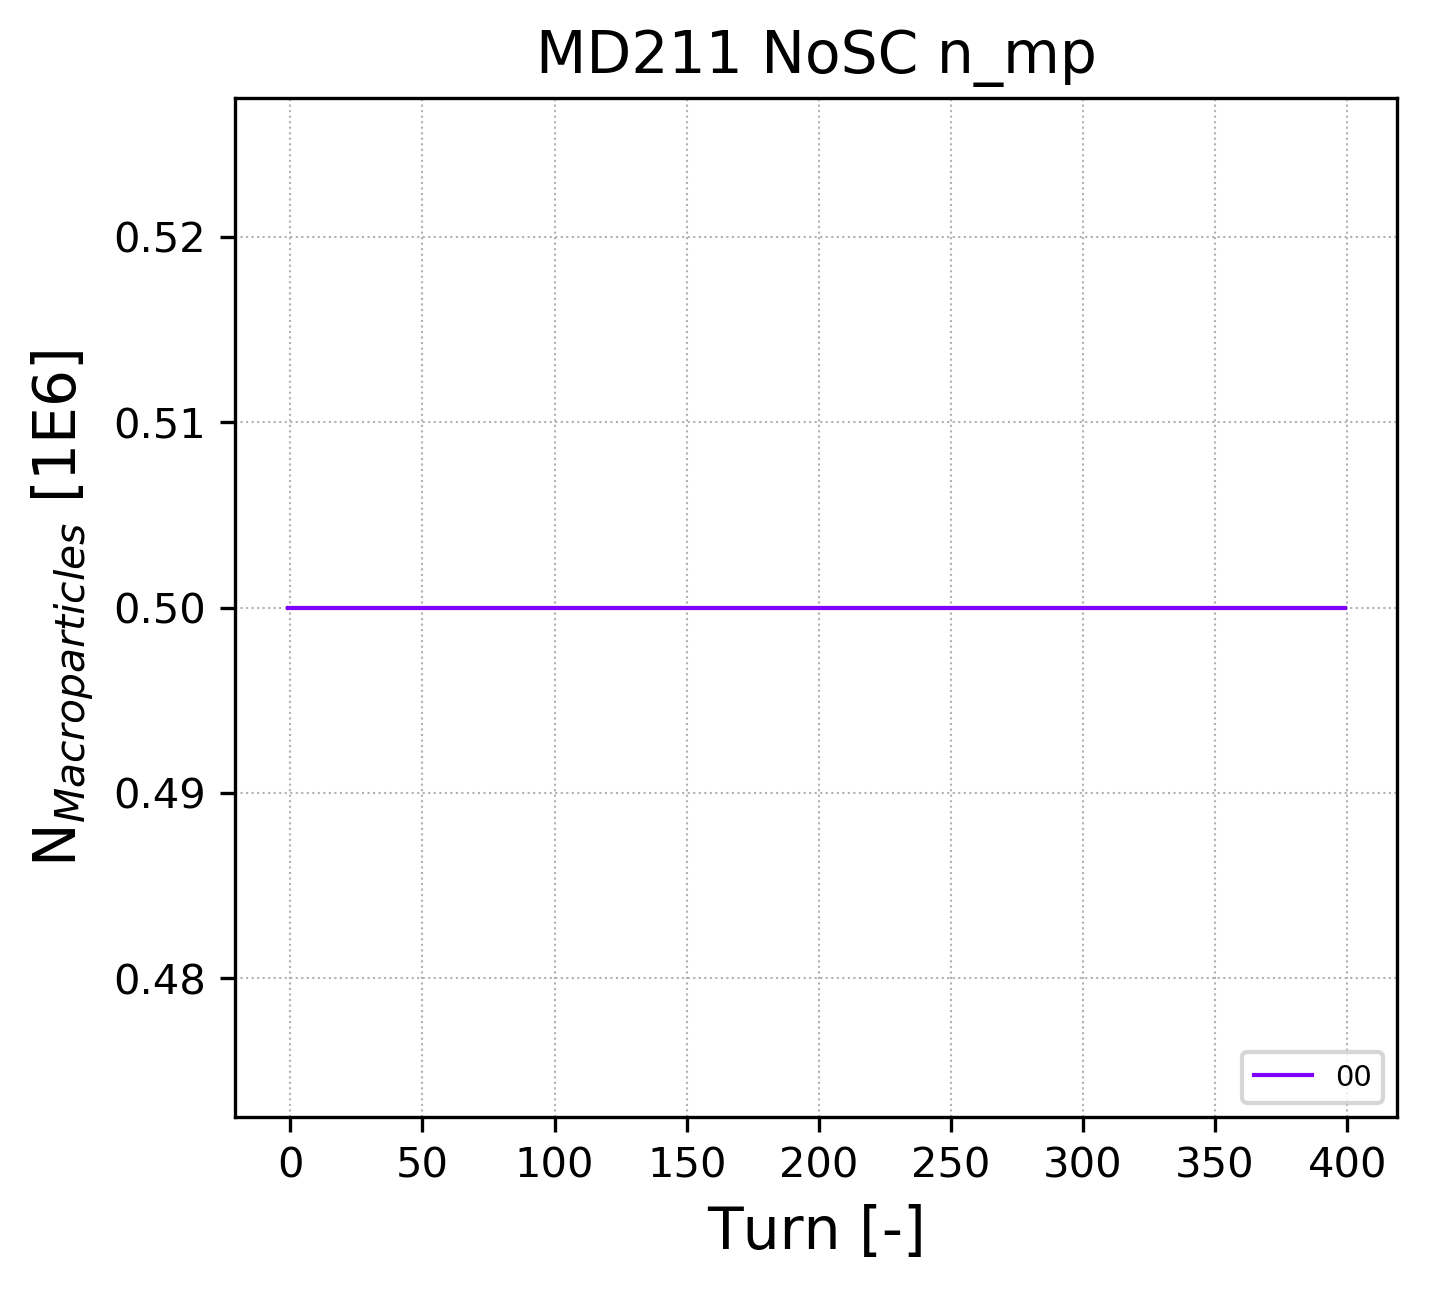

In [7]:
parameter = 'n_mp'
multi1 = 1E-6

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'N$_{Macroparticles}$ [1E6]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
        ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)

ax1.grid(lw=0.5, ls=':');
#ax1.set_xlim(-1,turn_tot)
#ax1.set_xlim(-1,zoom_turns)

savename = 'Plots/'+ main_label +'_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

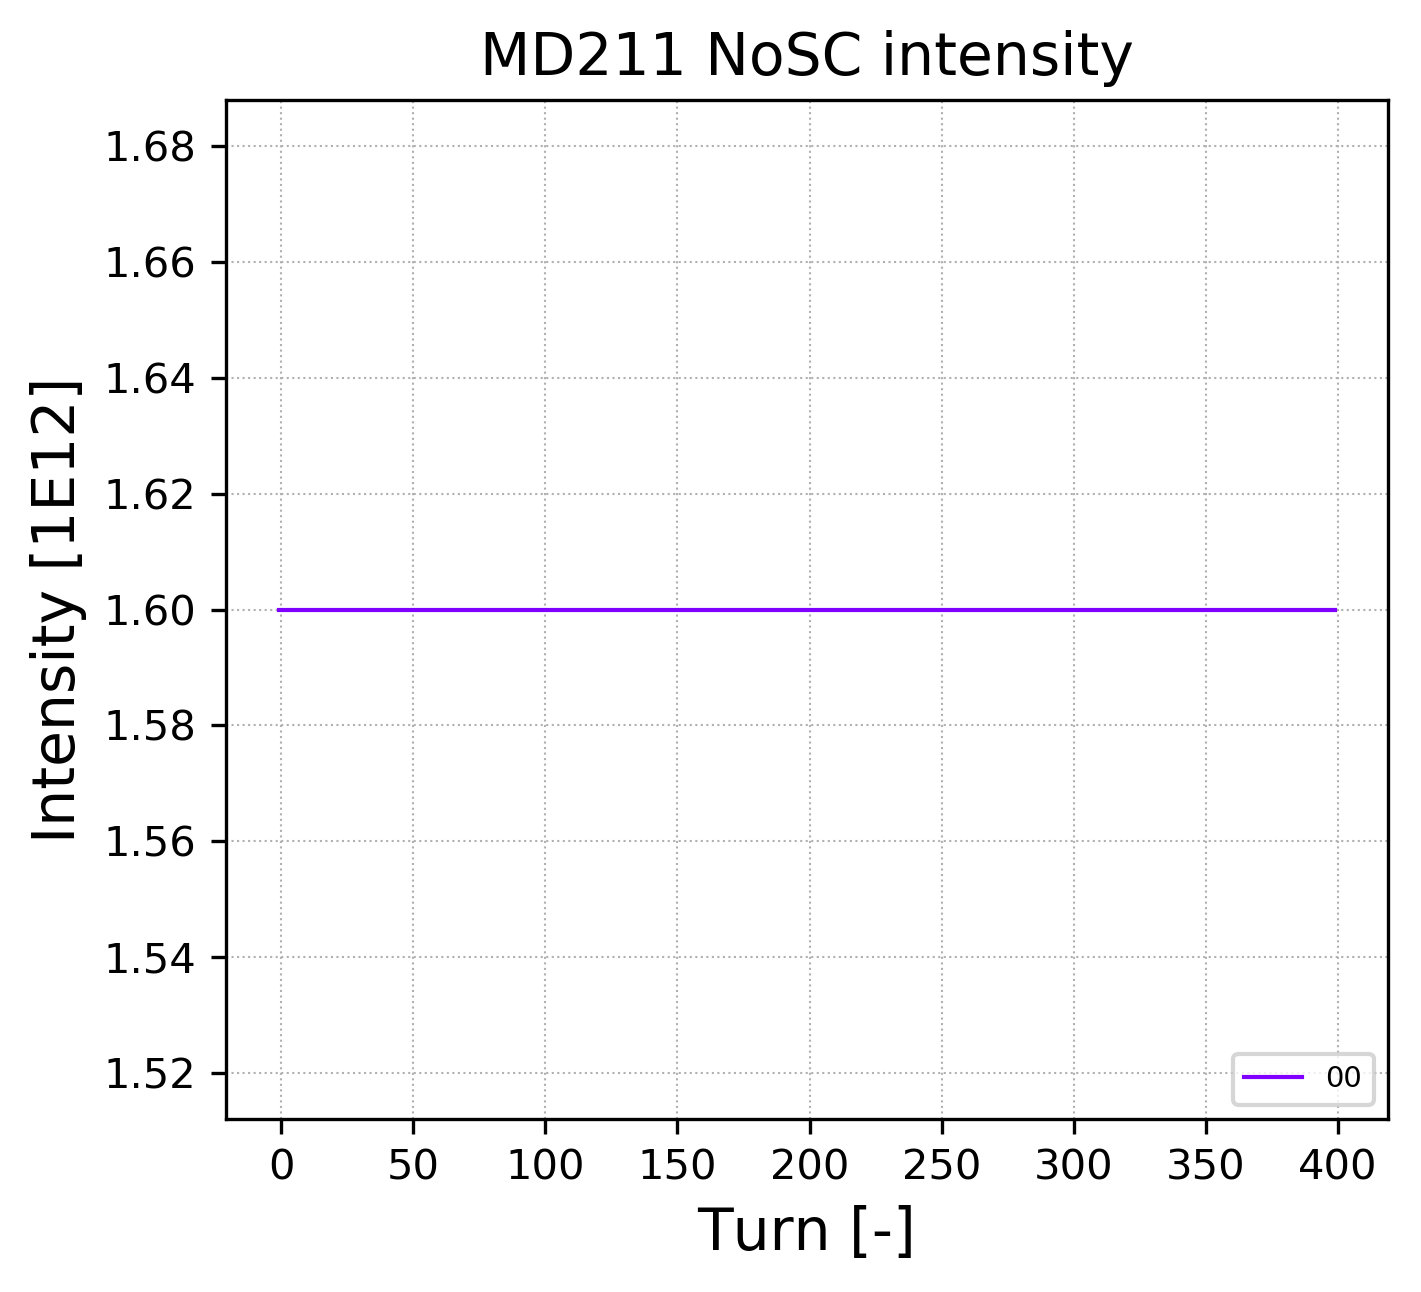

In [8]:
parameter = 'intensity'
multi1 = 1E-12

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel('Intensity [1E12]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
        ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)

ax1.grid(lw=0.5, ls=':');
#ax1.set_xlim(-1,turn_tot)
#ax1.set_xlim(-1,zoom_turns)

savename = 'Plots/'+ main_label +'_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

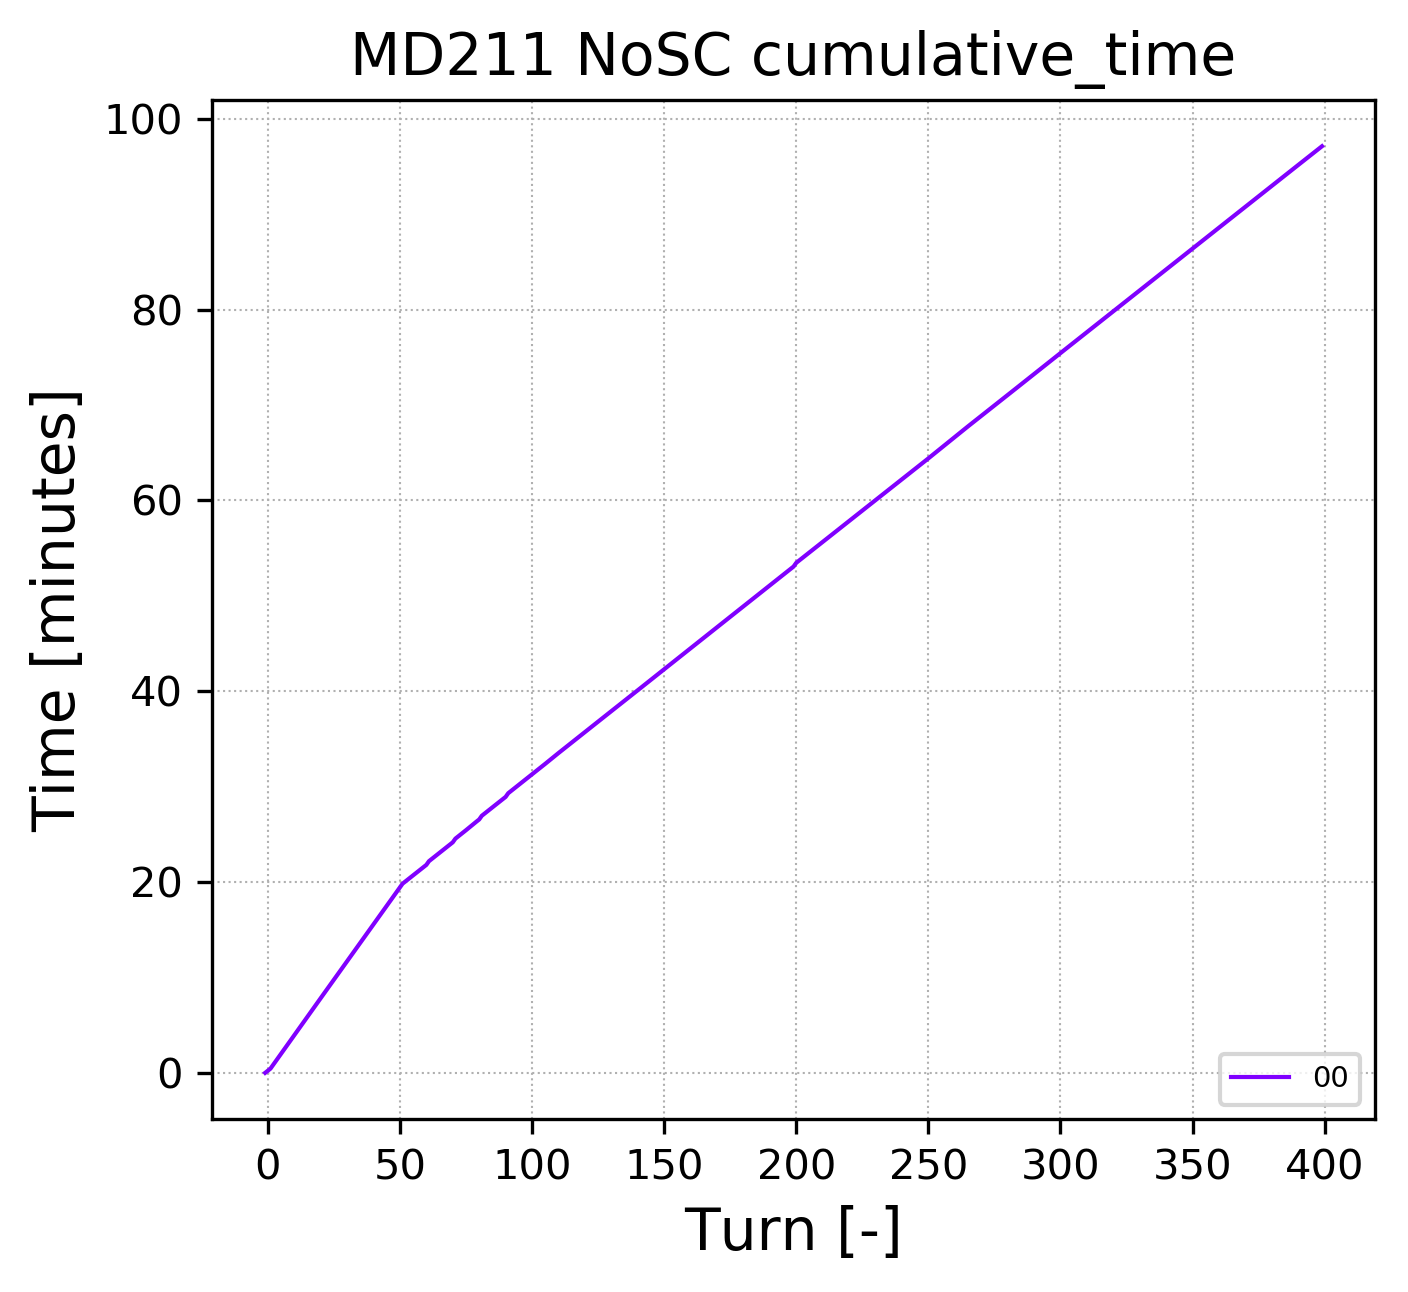

In [9]:
parameter = 'cumulative_time'
multi1 = 1./60.

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel('Time [minutes]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
        ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)

ax1.grid(lw=0.5, ls=':');
#ax1.set_xlim(-1,turn_tot)
#ax1.set_xlim(-1,zoom_turns)

savename = 'Plots/'+ main_label +'_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

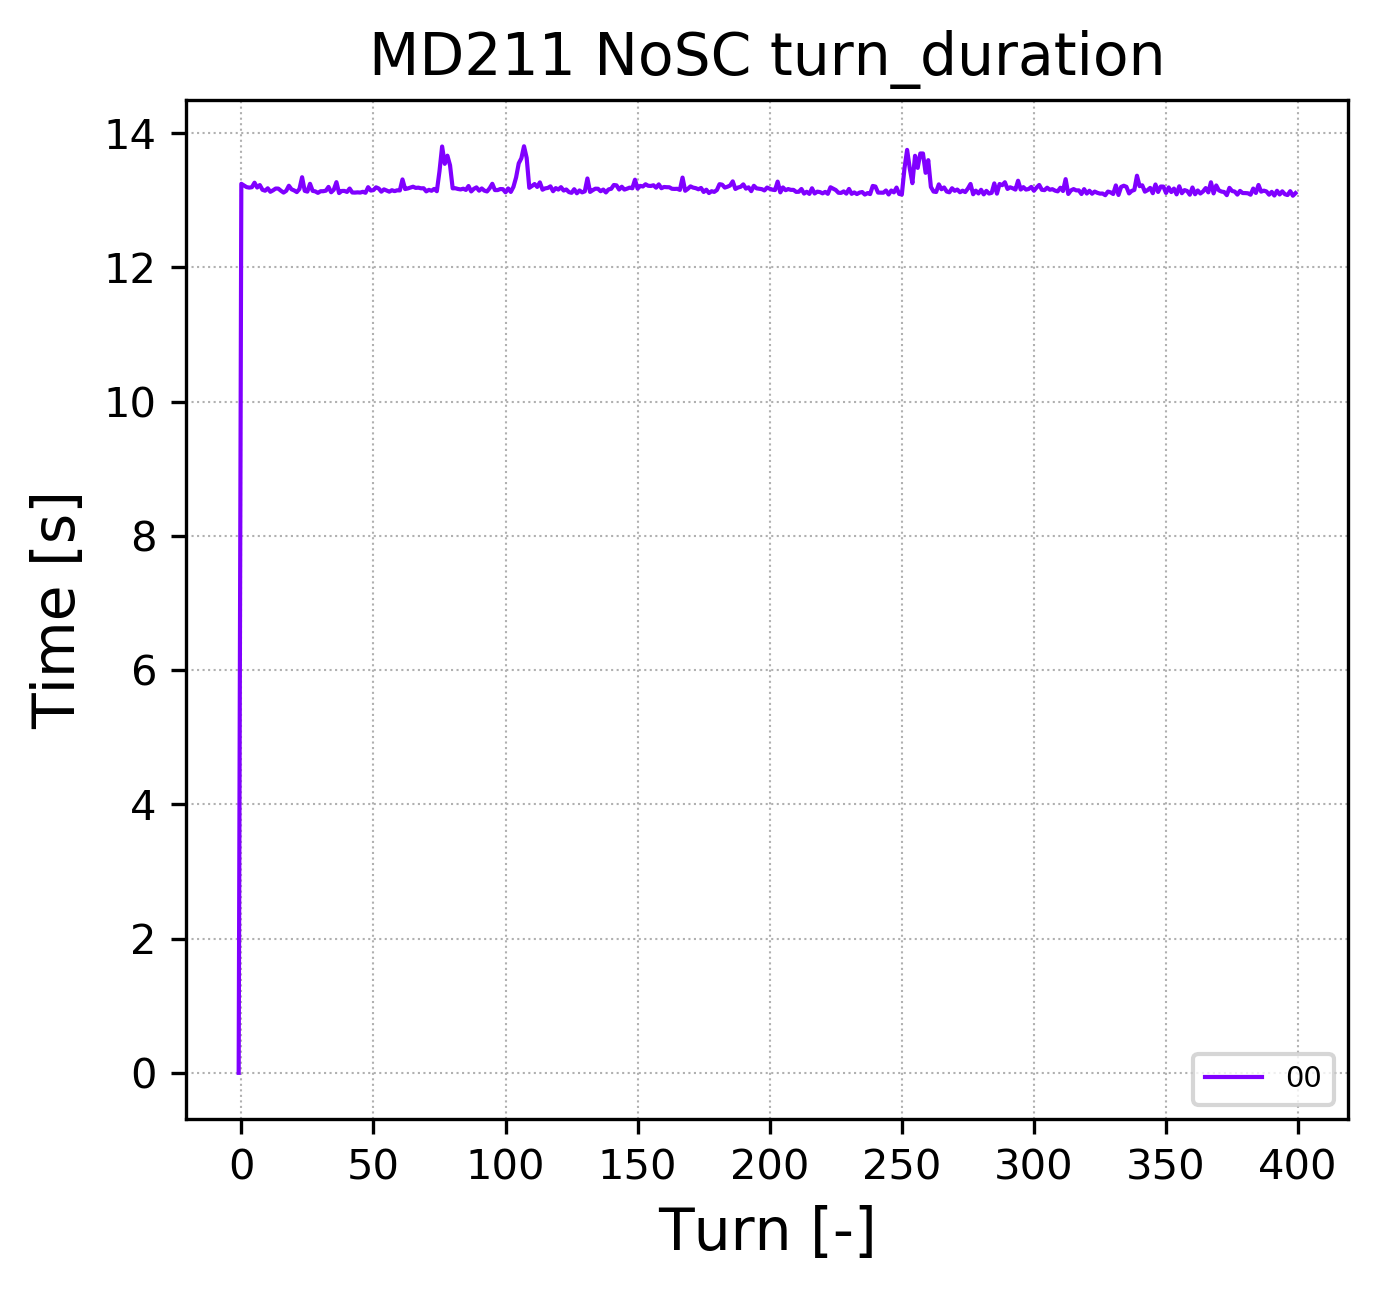

In [11]:
parameter = 'turn_duration'
multi1 = 1

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel('Time [s]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
        ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)

ax1.grid(lw=0.5, ls=':');
#ax1.set_ylim(23, 26)
#ax1.set_xlim(1,150)
#ax1.set_xlim(-1,turn_tot)
#ax1.set_xlim(-1,zoom_turns)

savename = 'Plots/'+ main_label +'_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

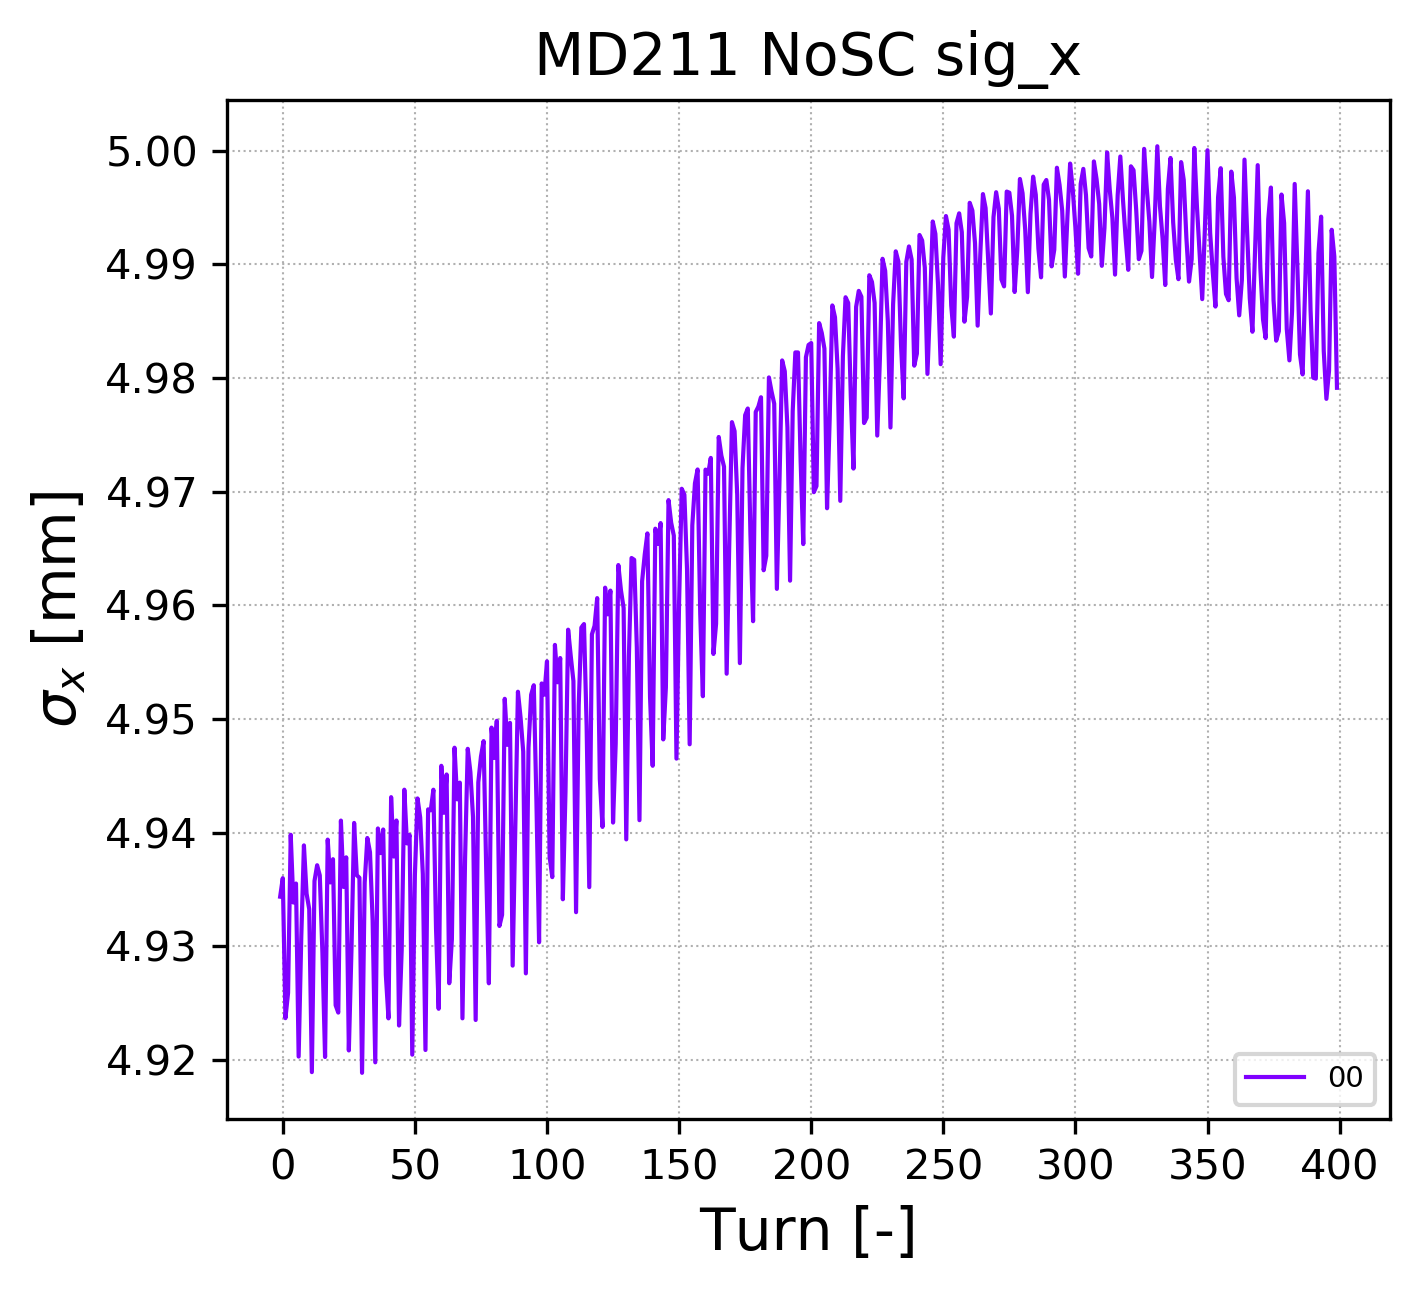

In [12]:
parameter = 'sig_x'
multi1 = 1E3

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_x$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
        ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)

ax1.grid(lw=0.5, ls=':');
#ax1.set_xlim(-1,turn_tot)
#ax1.set_xlim(-1,zoom_turns)

savename = 'Plots/'+ main_label +'_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

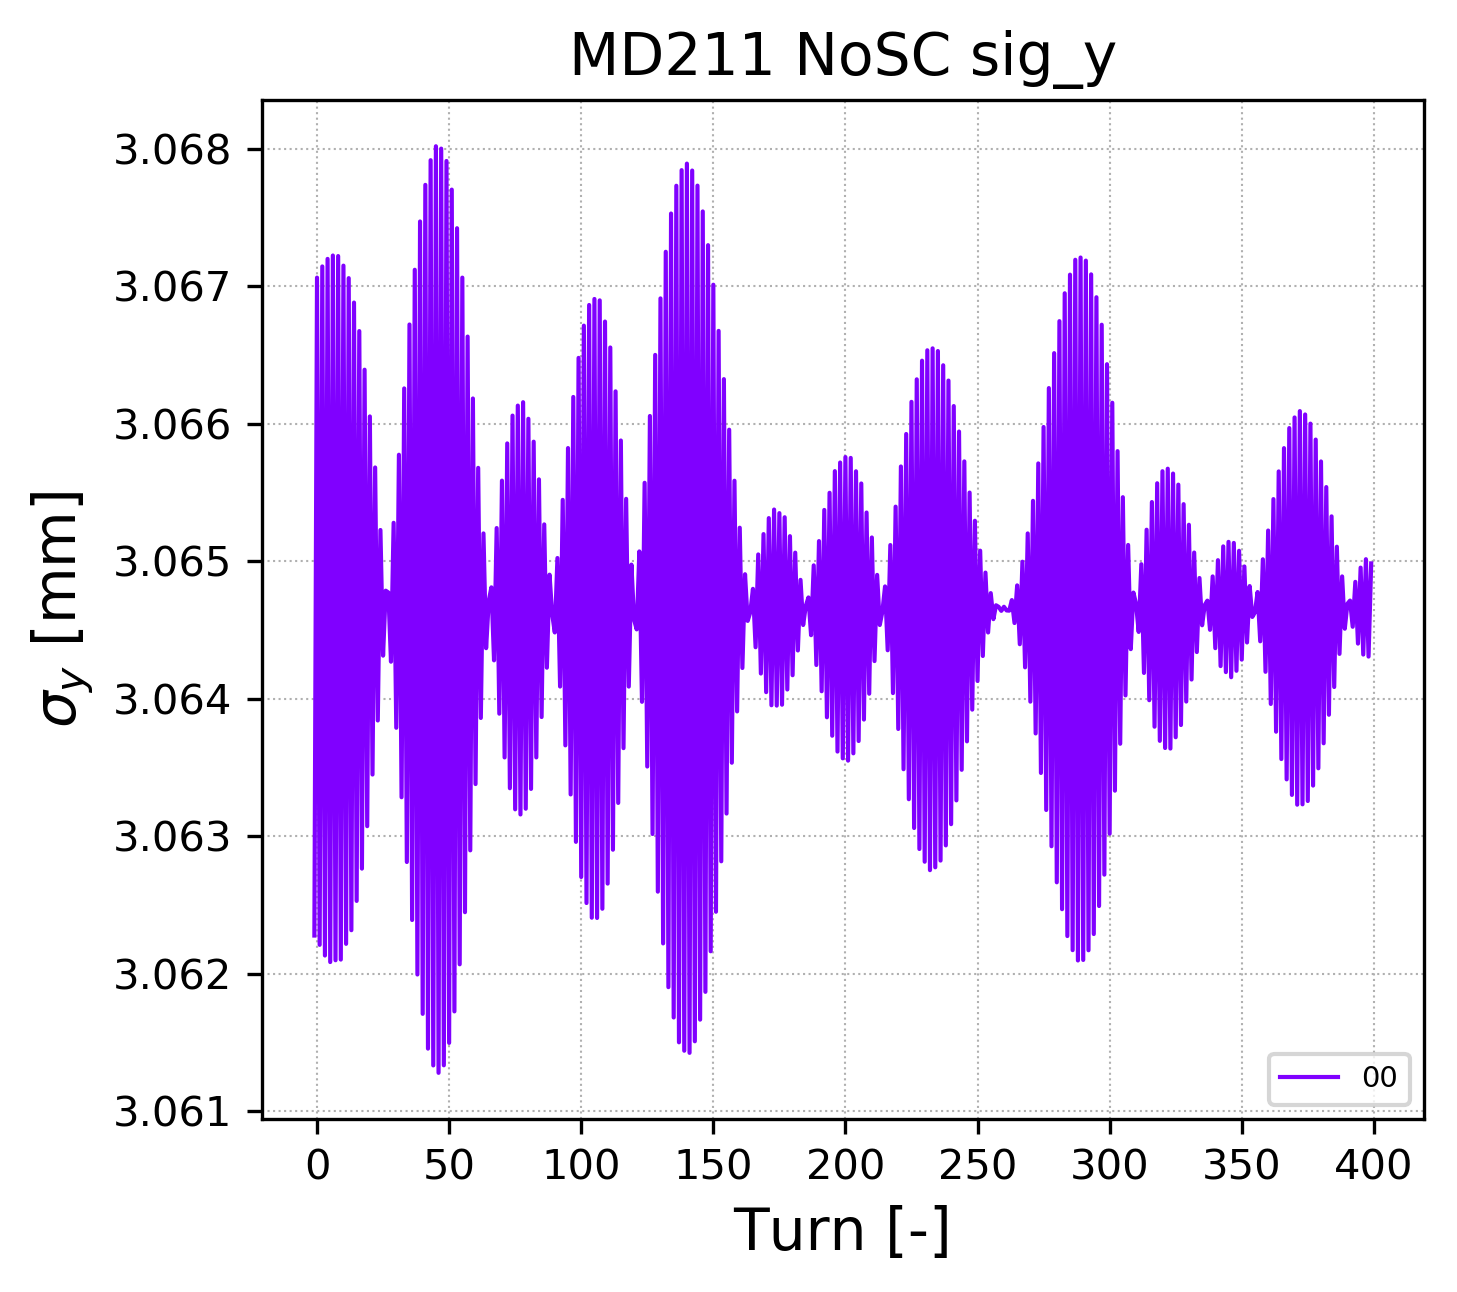

In [13]:
parameter = 'sig_y'
multi1 = 1E3

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_y$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
        ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)

ax1.grid(lw=0.5, ls=':');
#ax1.set_xlim(-1,turn_tot)
#ax1.set_xlim(-1,zoom_turns)

savename = 'Plots/'+ main_label +'_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

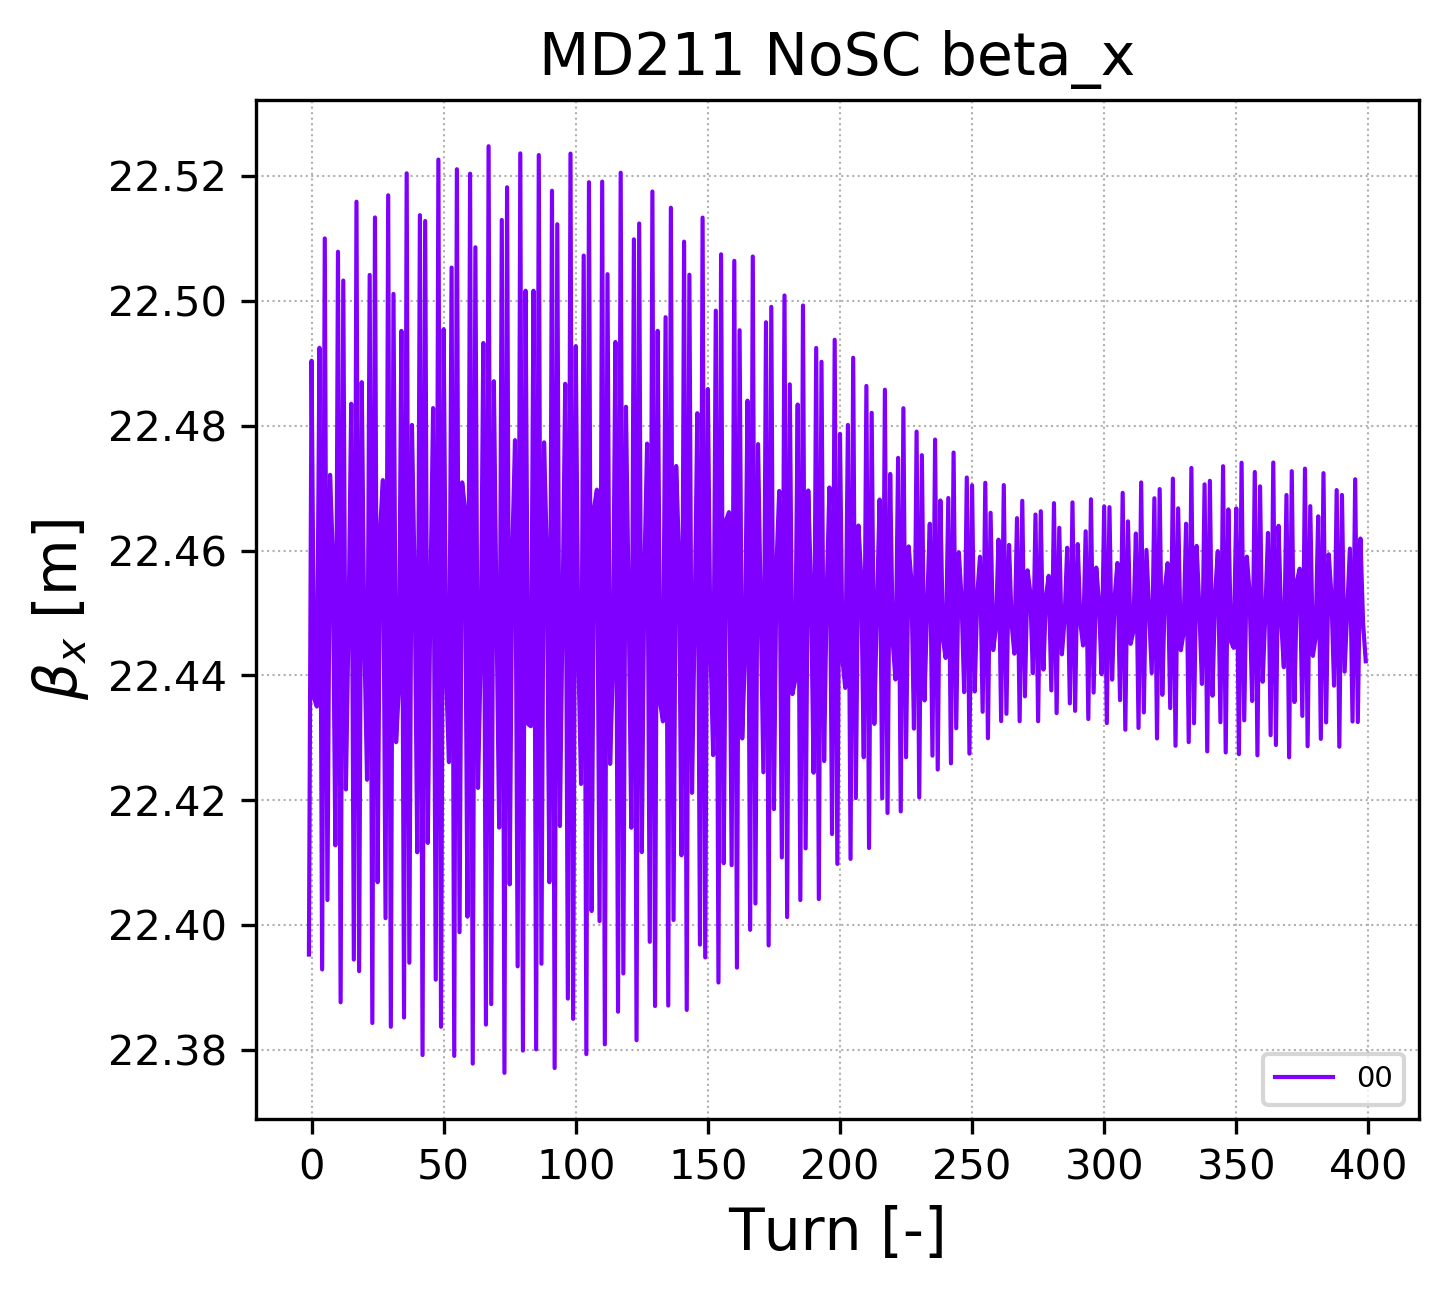

In [14]:
parameter = 'beta_x'
multi1 = 1

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\beta_x$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
        ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)

ax1.grid(lw=0.5, ls=':');
#ax1.set_xlim(-1,turn_tot)
#ax1.set_xlim(-1,zoom_turns)

savename = 'Plots/'+ main_label +'_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

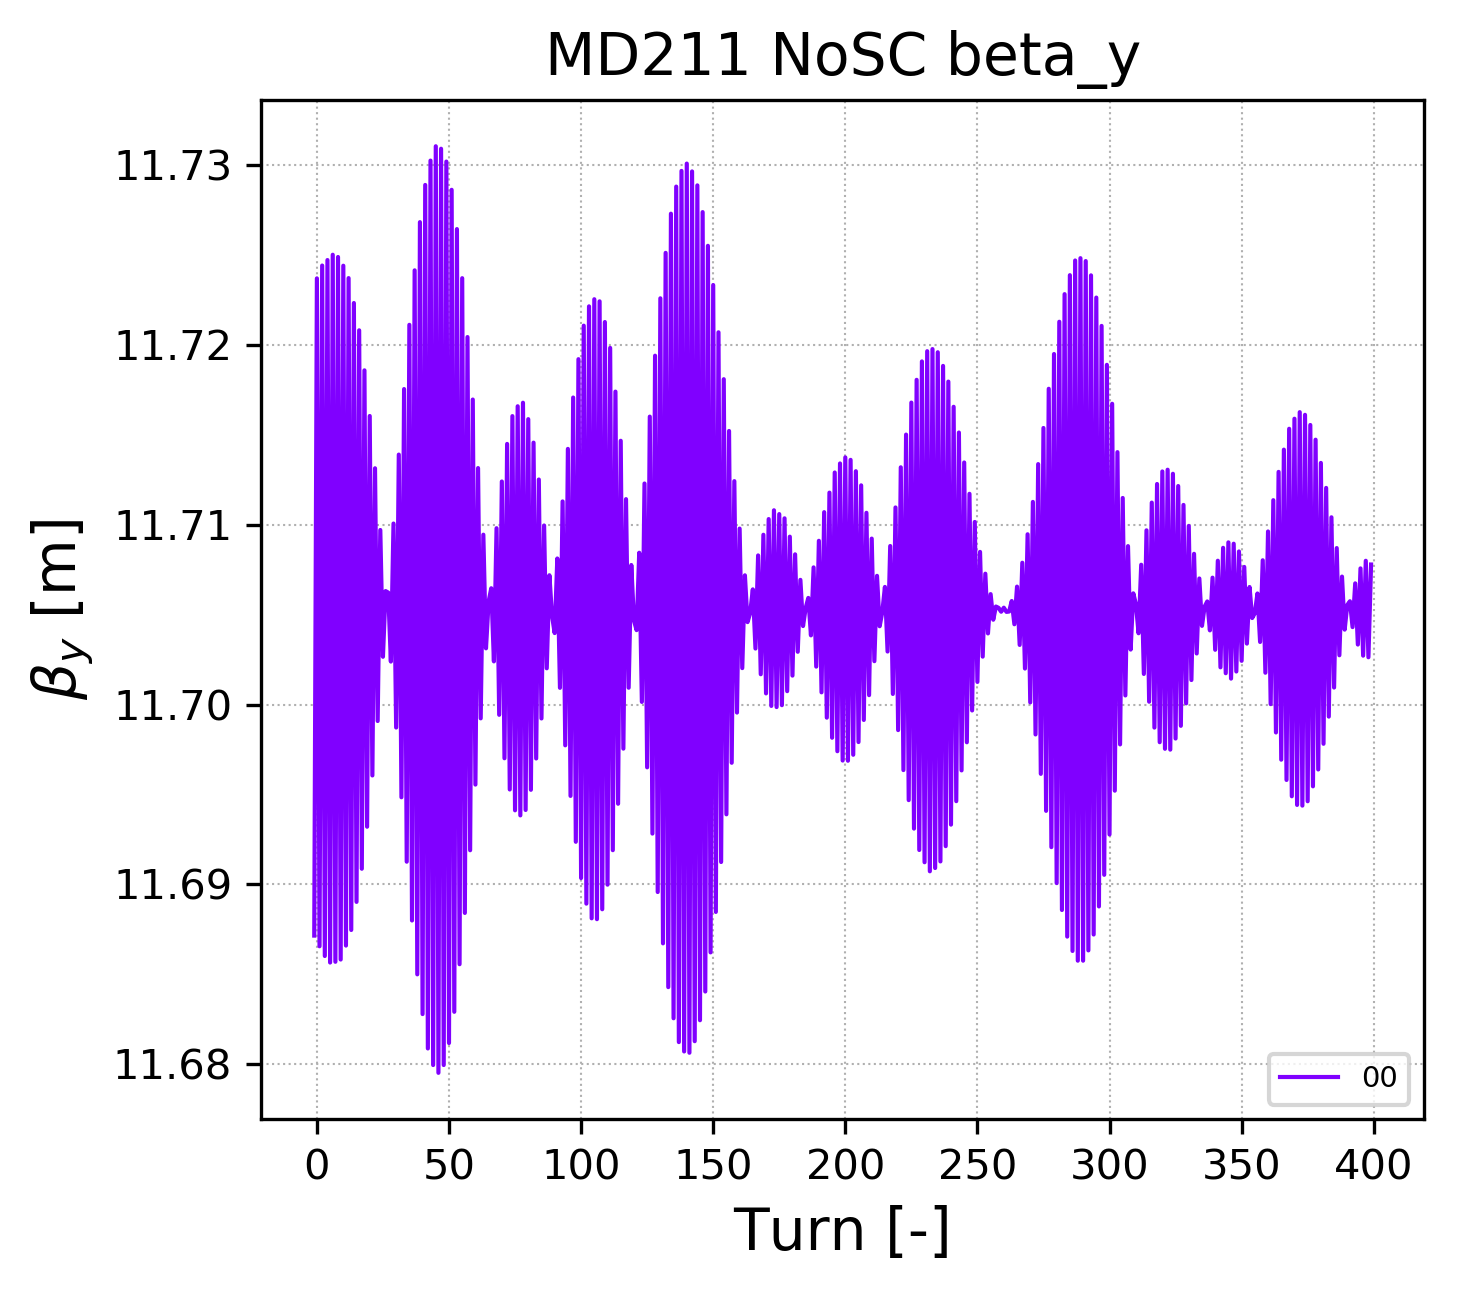

In [15]:
parameter = 'beta_y'
multi1 = 1

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\beta_y$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
        ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)

ax1.grid(lw=0.5, ls=':');
#ax1.set_xlim(-1,turn_tot)
#ax1.set_xlim(-1,zoom_turns)

savename = 'Plots/'+ main_label +'_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

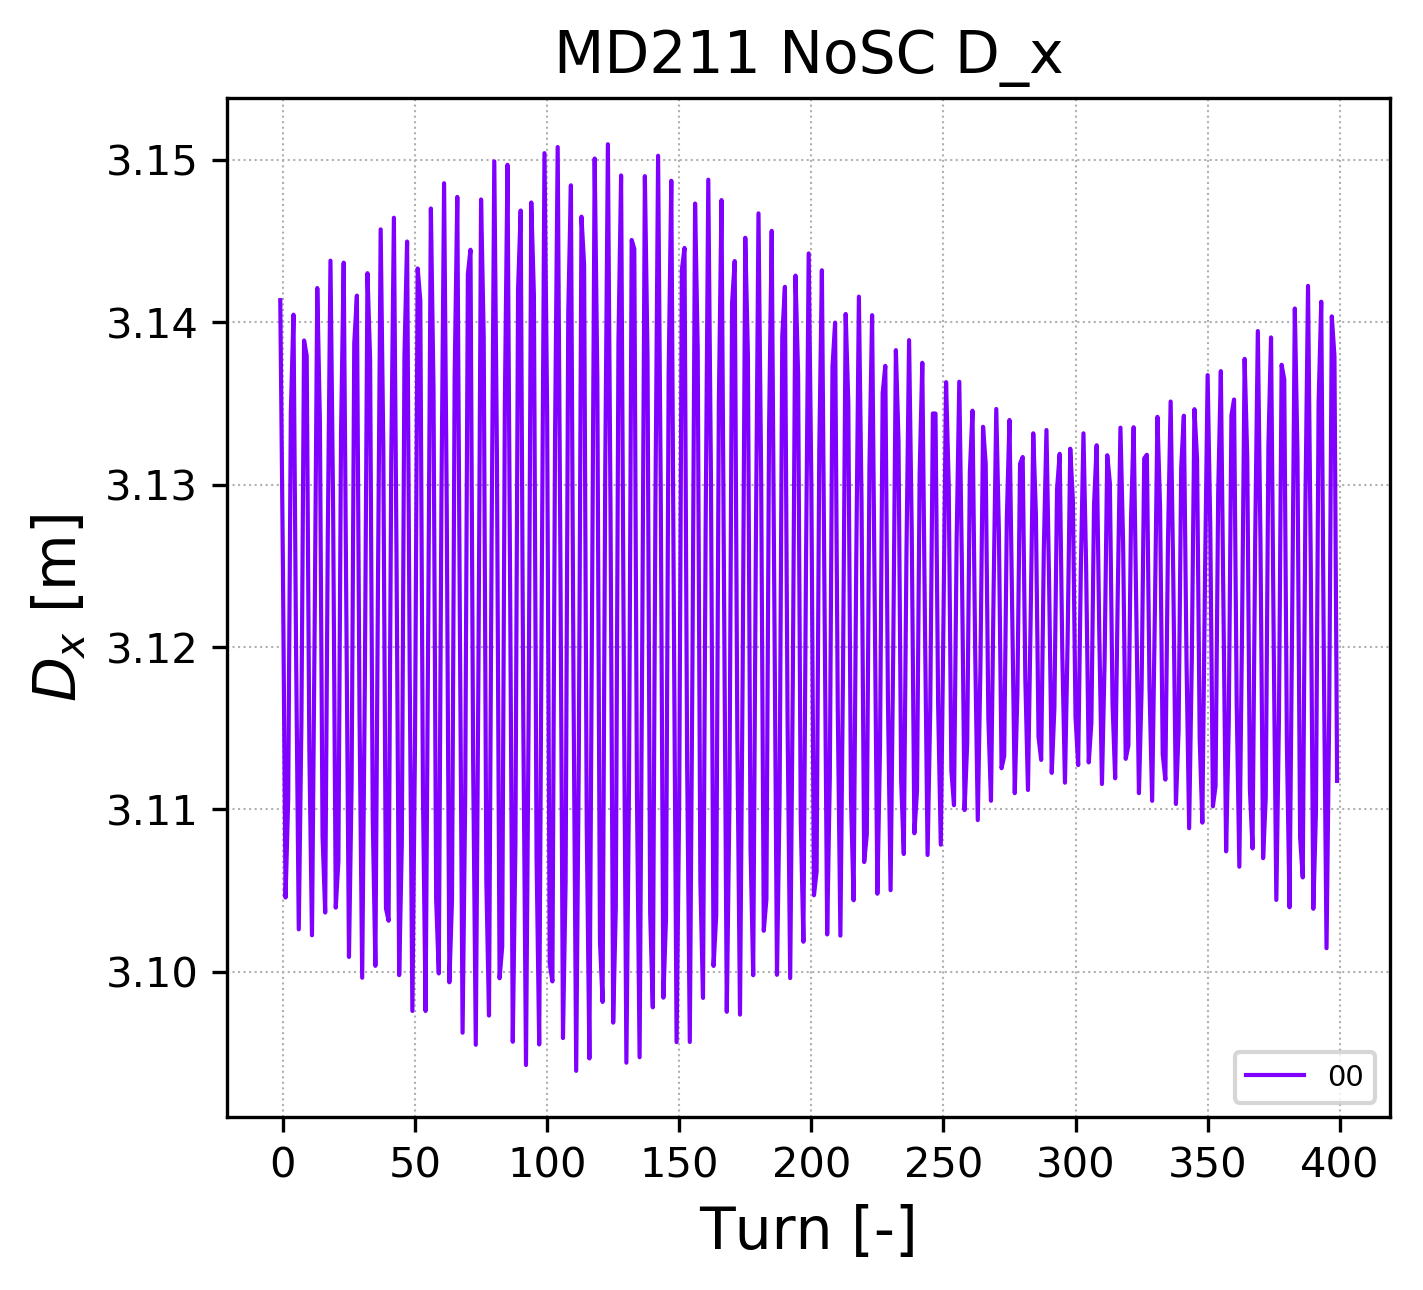

In [16]:
parameter = 'D_x'
multi1 = 1

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$D_x$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
        ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)

ax1.grid(lw=0.5, ls=':');
#ax1.set_xlim(-1,turn_tot)
#ax1.set_xlim(-1,zoom_turns)

savename = 'Plots/'+ main_label +'_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

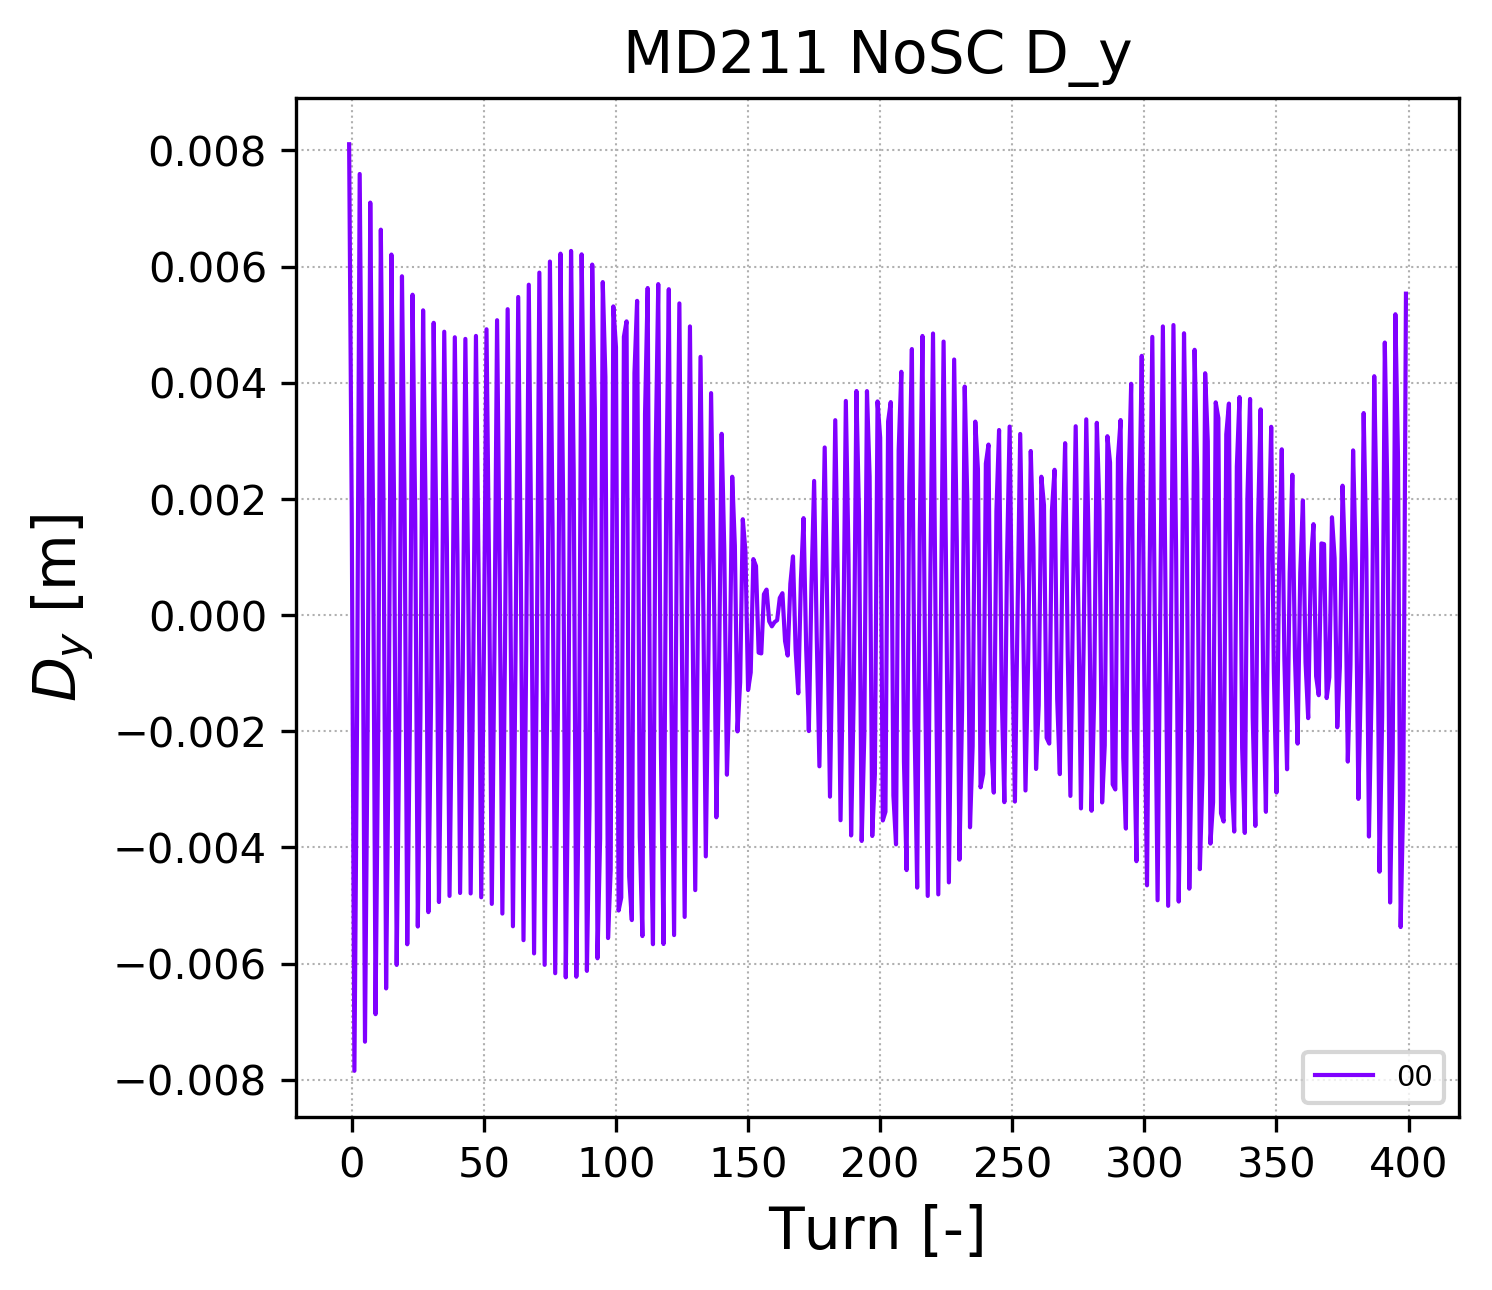

In [17]:
parameter = 'D_y'
multi1 = 1

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$D_y$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
        ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)

ax1.grid(lw=0.5, ls=':');
#ax1.set_xlim(-1,turn_tot)
#ax1.set_xlim(-1,zoom_turns)

savename = 'Plots/'+ main_label +'_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

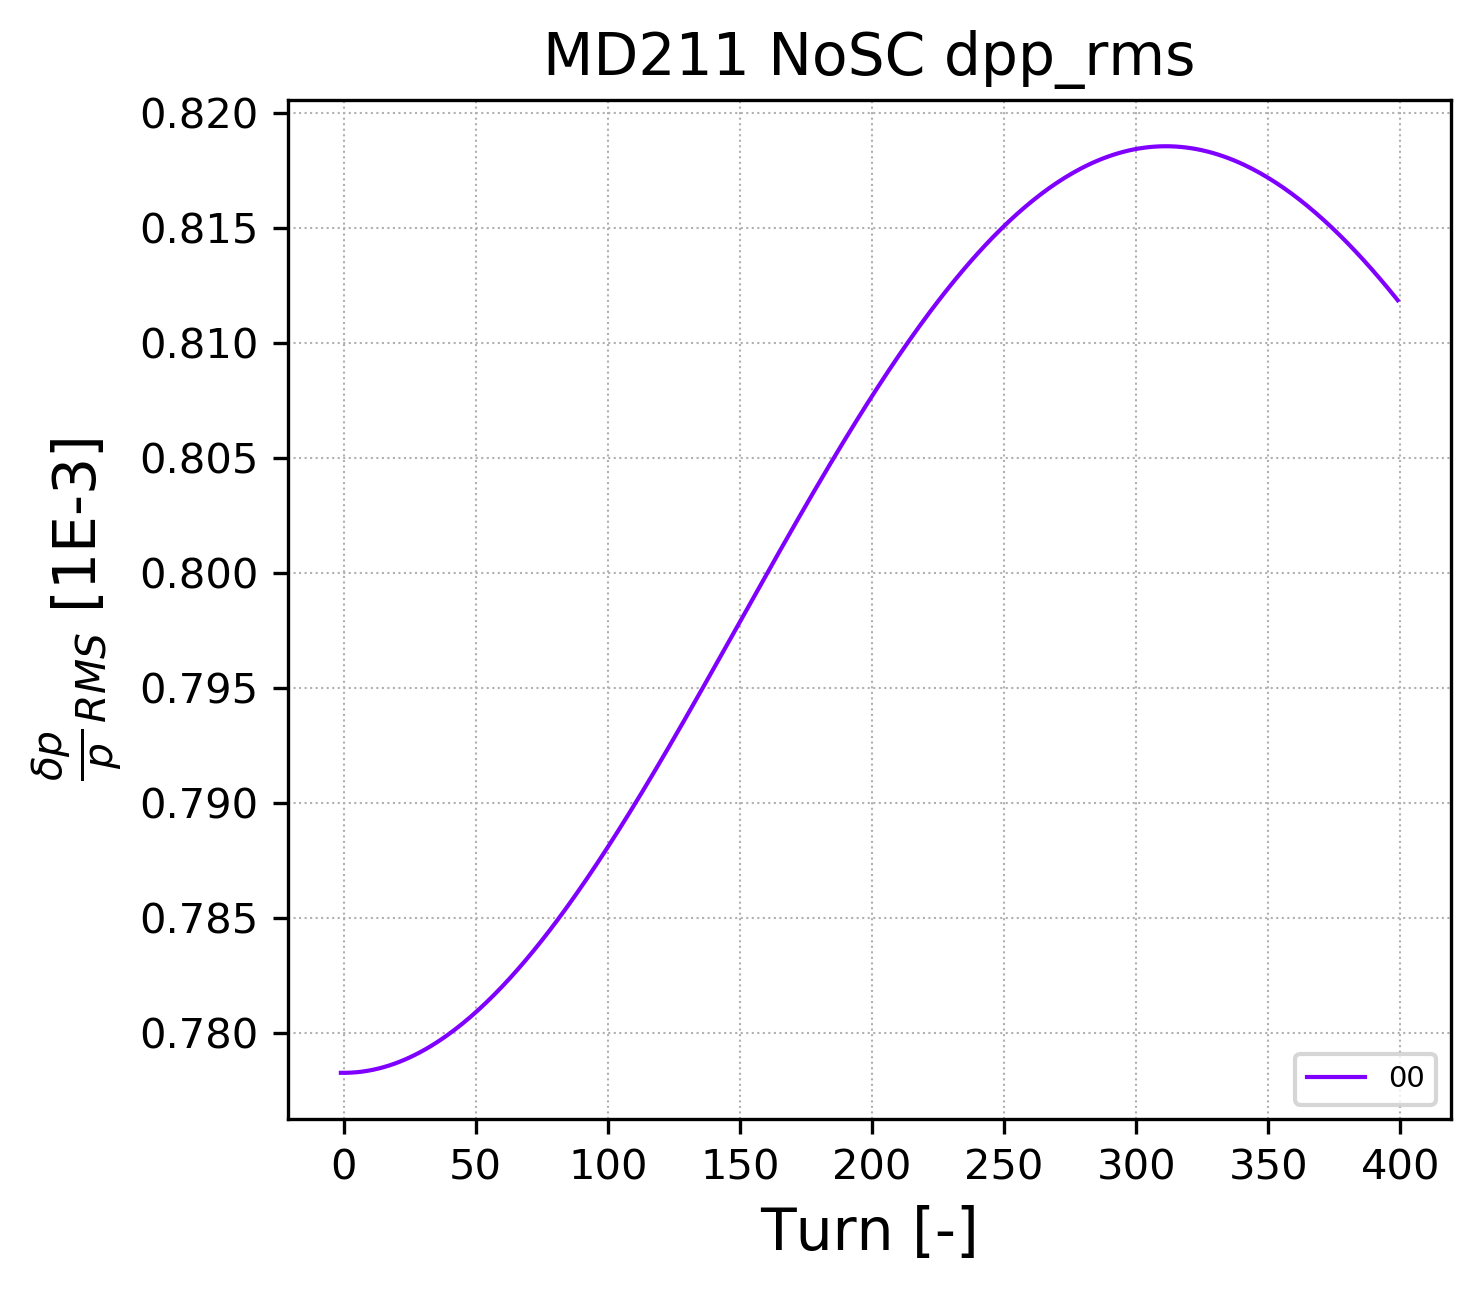

In [18]:
parameter = 'dpp_rms'
multi1 = 1E3

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\frac{\delta p}{p}_{RMS}$ [1E-3]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
        ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)

ax1.grid(lw=0.5, ls=':');
#ax1.set_xlim(-1,turn_tot)
#ax1.set_xlim(-1,zoom_turns)

savename = 'Plots/'+ main_label +'_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

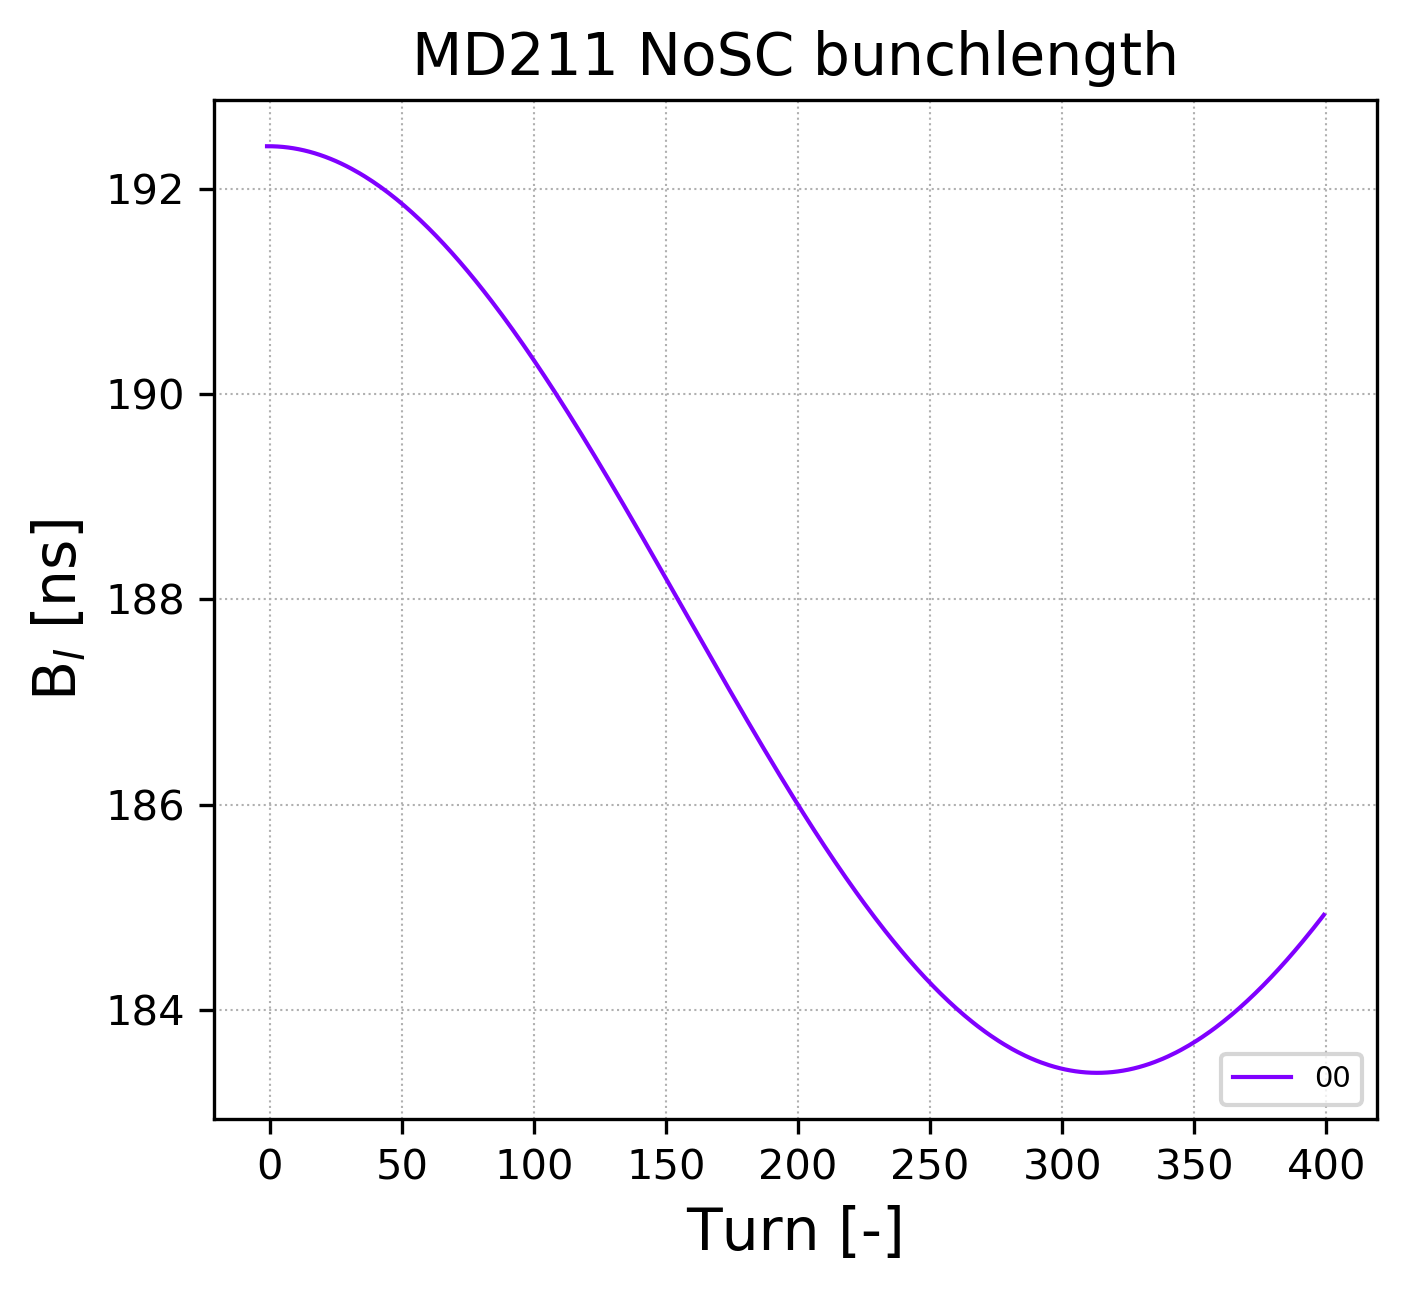

In [19]:
parameter = 'bunchlength'
multi1 = 1E9

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'B$_l$ [ns]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
        ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)

ax1.grid(lw=0.5, ls=':');
#ax1.set_xlim(-1,turn_tot)
#ax1.set_xlim(-1,zoom_turns)

savename = 'Plots/'+ main_label +'_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

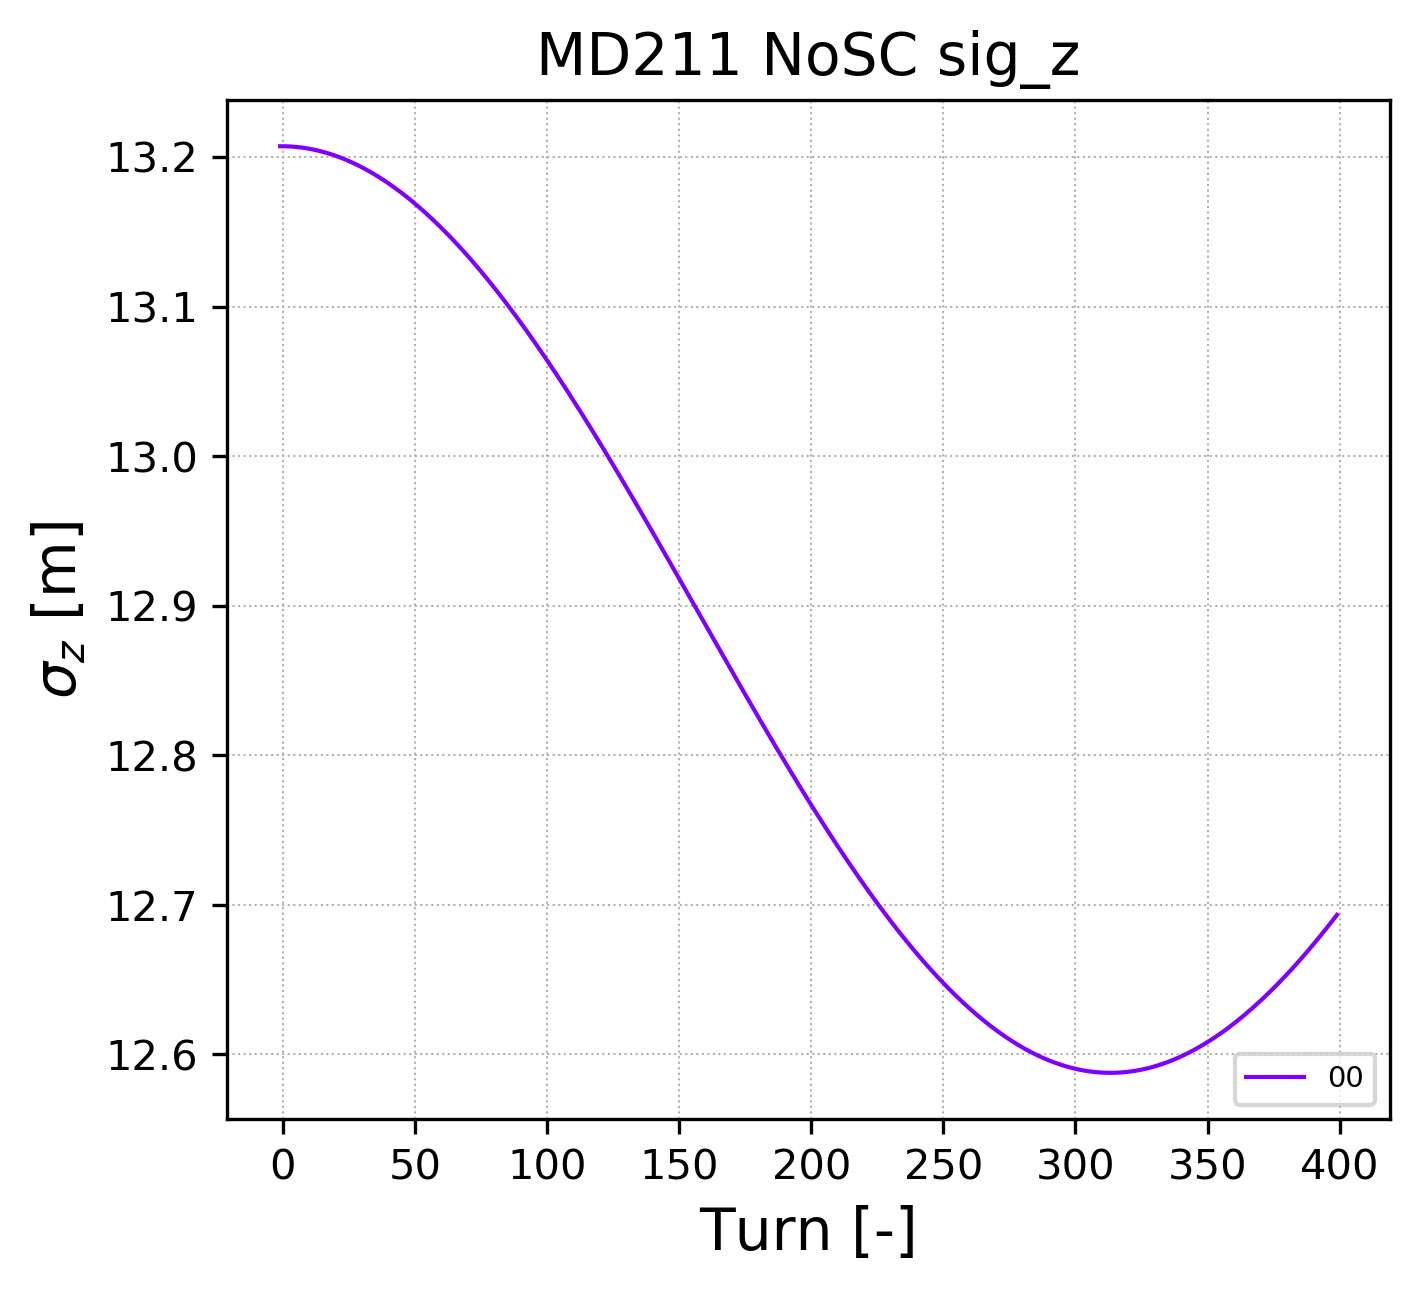

In [20]:
parameter = 'sig_z'
multi1 = 1

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sigma_z$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
        ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)

ax1.grid(lw=0.5, ls=':');
#ax1.set_xlim(-1,turn_tot)
#ax1.set_xlim(-1,zoom_turns)

savename = 'Plots/'+ main_label +'_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

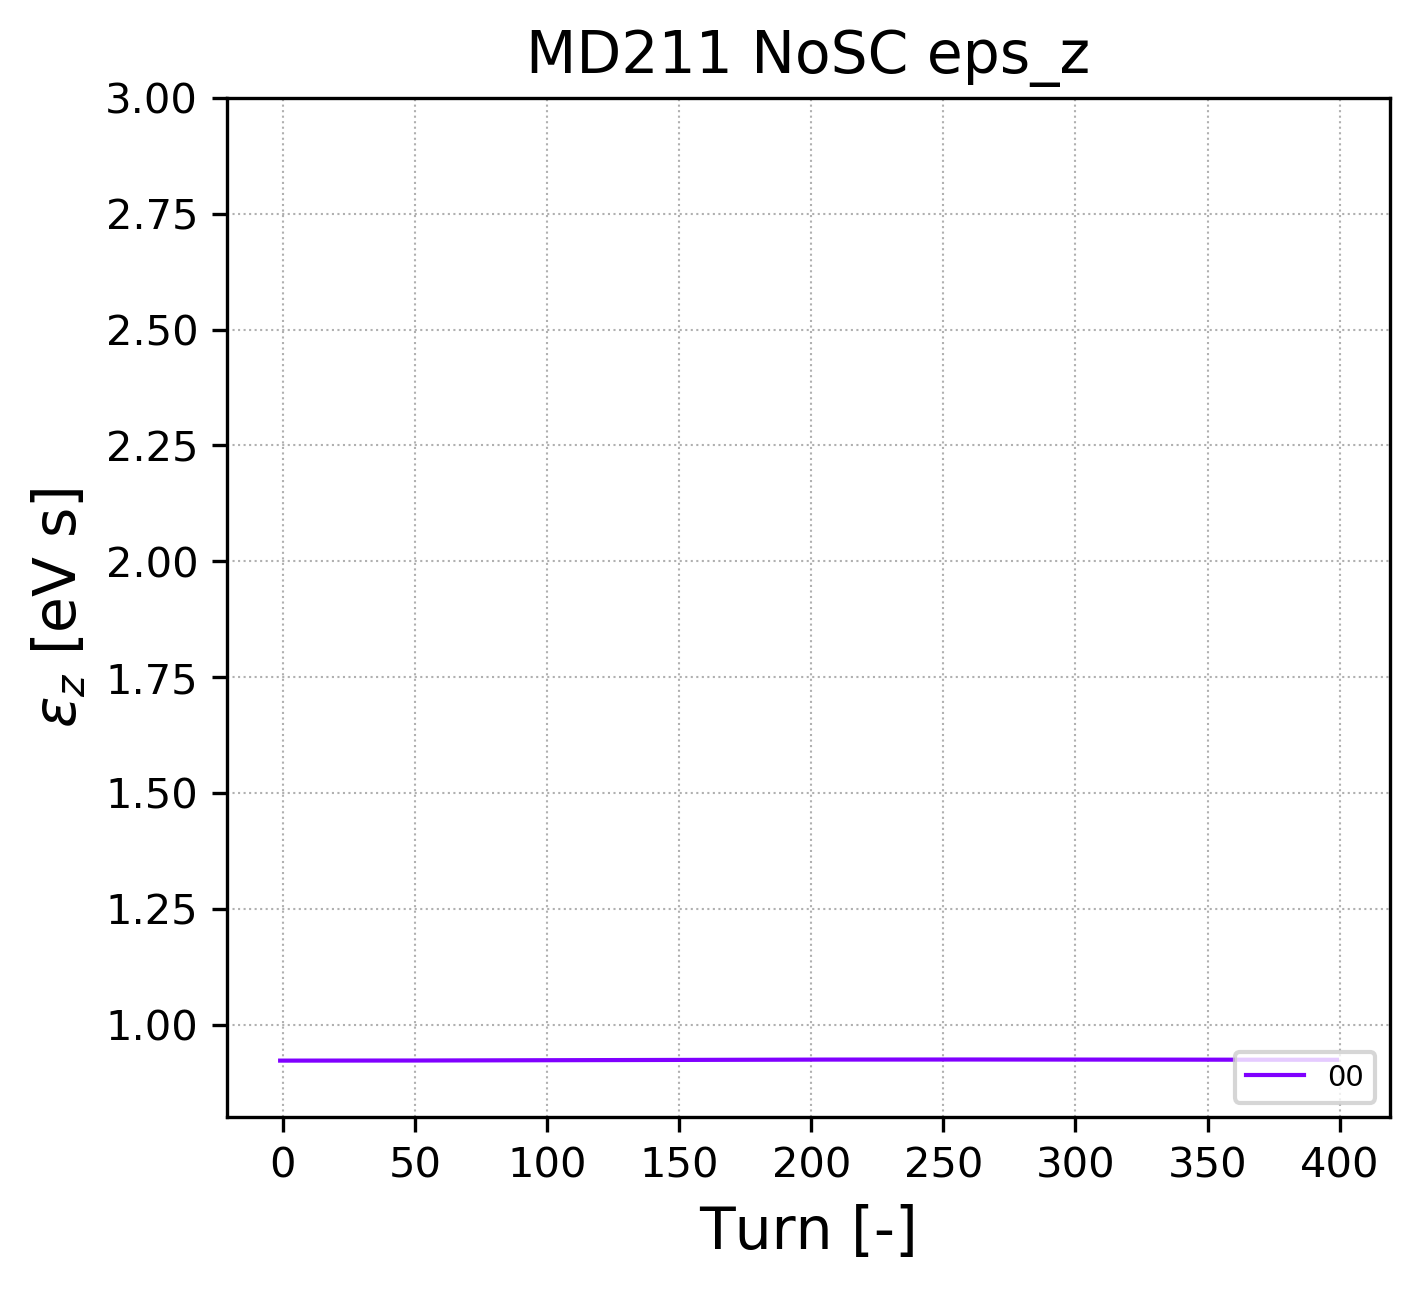

In [26]:
parameter = 'eps_z'
multi1 = 1

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_z$ [eV s]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
        ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)

ax1.grid(lw=0.5, ls=':');
ax1.set_ylim(0.8,3)
#ax1.set_xlim(-1,turn_tot)
#ax1.set_xlim(-1,zoom_turns)

savename = 'Plots/'+ main_label +'_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

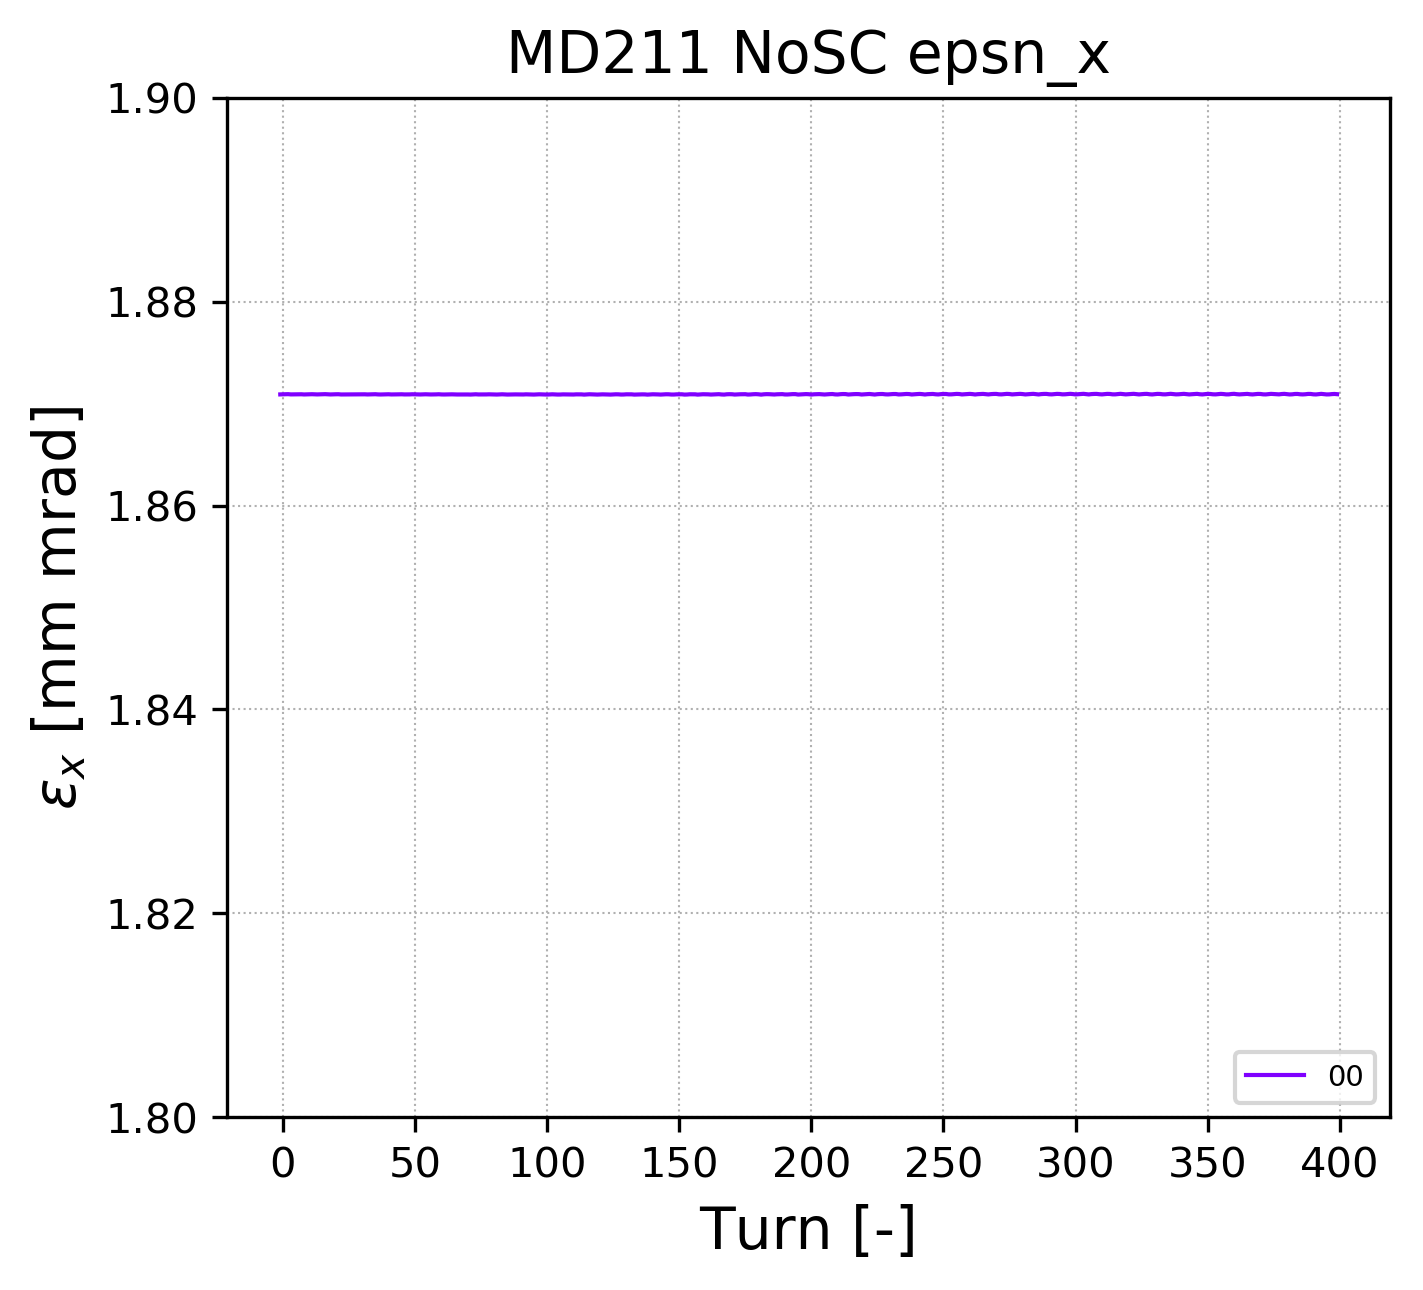

In [27]:
parameter = 'epsn_x'
multi1 = 1E6

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_x$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
        ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)

ax1.grid(lw=0.5, ls=':');
ax1.set_ylim(1.8, 1.9)
#ax1.set_xlim(-1,turn_tot)
#ax1.set_xlim(-1,zoom_turns)

savename = 'Plots/'+ main_label +'_' + parameter + '.png'
plt.savefig(savename, dpi = 800);

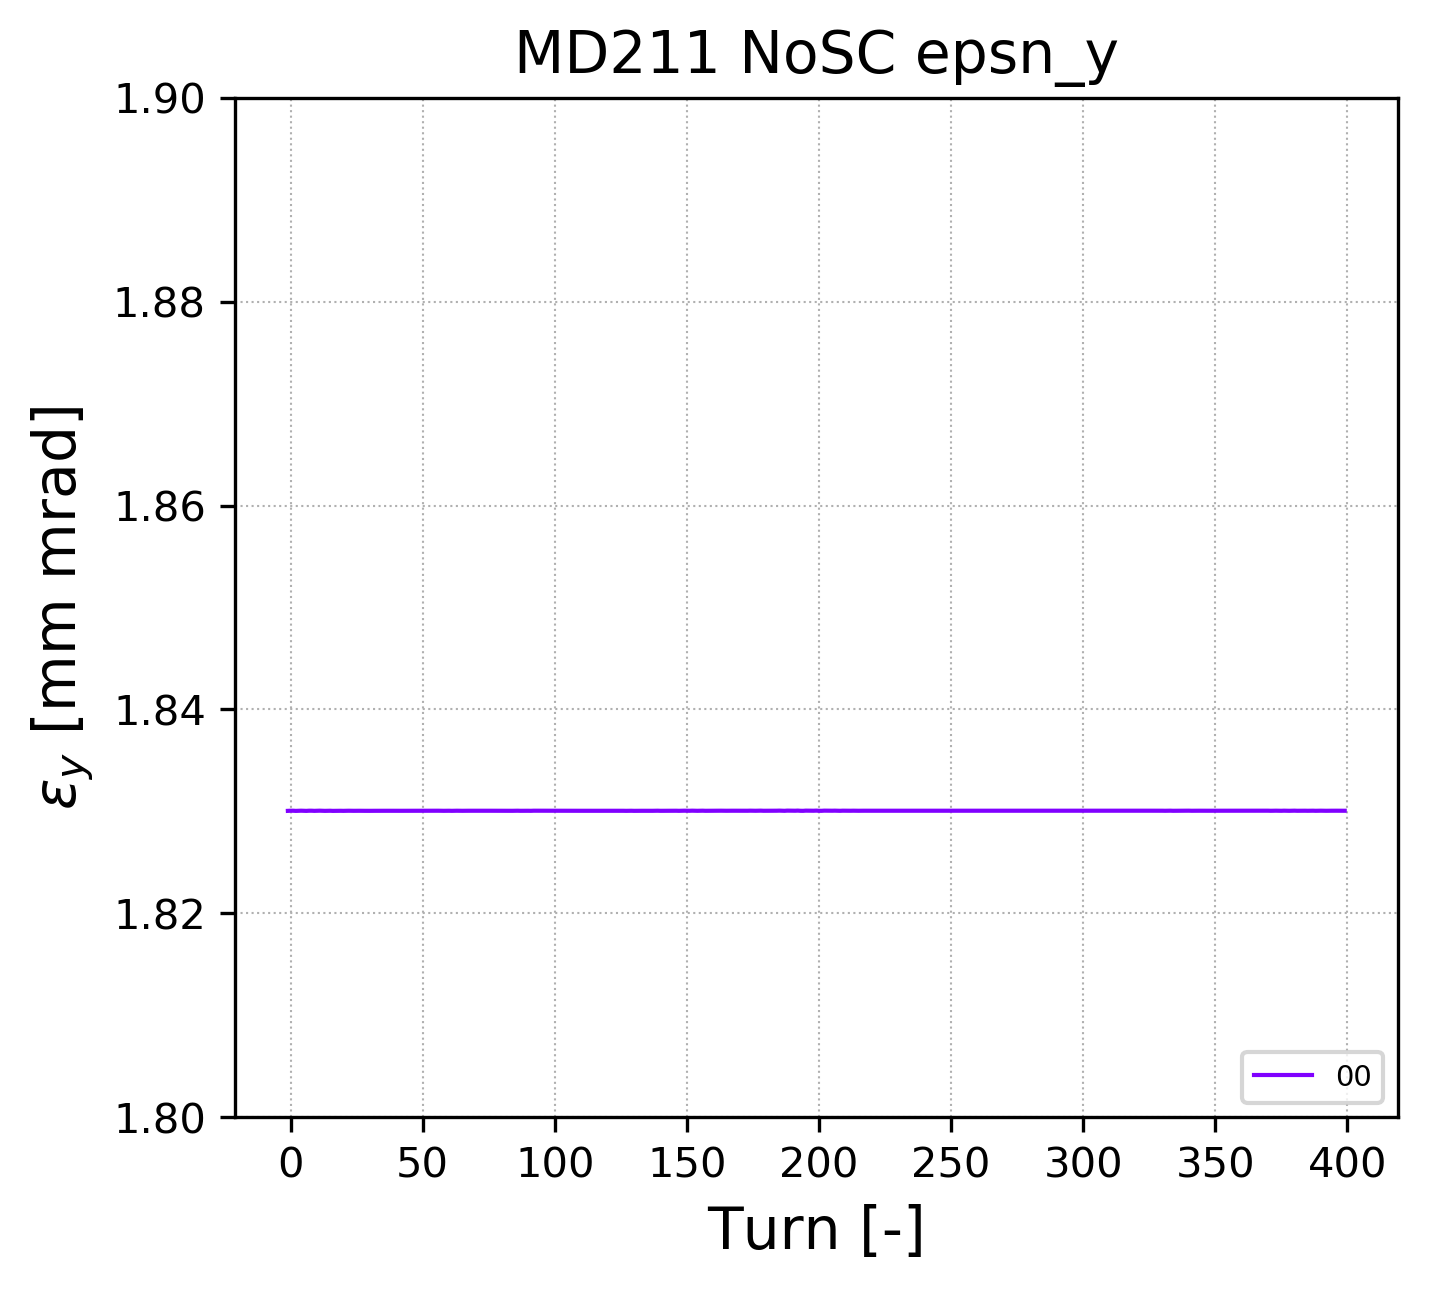

In [28]:
parameter = 'epsn_y'
multi1 = 1E6

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_y$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd.keys())))
c_it = int(0)

for key, value in sorted(dd.iteritems()):
        ax1.plot(dd[key]['turn'][0], dd[key][parameter][0]*multi1, label=key, color=colors[c_it]);
        c_it = c_it + 1;
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)

ax1.grid(lw=0.5, ls=':');
ax1.set_ylim(1.8, 1.9)
#ax1.set_xlim(-1,turn_tot)
#ax1.set_xlim(-1,zoom_turns)

savename = 'Plots/'+ main_label +'_' + parameter + '.png'
plt.savefig(savename, dpi = 800);